# HR Data Cleaning&Exploration + Decision Trees

Before we begin analysing our Employee data we want to ensure we have basic understanding of our dataset and it is clean and standardized. So, first, we complete the following steps:

1. Check for null values
2. Check for data inconsistencies
3. Fill NaN values where necessary
4. Explore correlations


In [1]:
#Importing dependencies
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
#Reading main dataset into pandas df
hr_df = pd.read_csv("Desktop/HR_Dataset/hr/core_dataset.csv")

In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

In [4]:
hr_df.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [5]:
#Exploring categorical data
hr_df.describe(include=['O'])

,Employee Name,State,DOB,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
count,301,301,301,301,301,301,301,301,301,103,301,301,301,301,301,301,301
unique,301,28,298,3,5,3,4,6,93,93,17,5,7,24,20,22,7
top,"DiNocco, Lily",MA,9/9/1965,Female,Single,US Citizen,No,White,1/10/2011,9/24/2012,N/A - still employed,Active,Production,Production Technician I,Kissy Sullivan,Employee Referral,Fully Meets
freq,1,266,2,174,127,285,271,190,14,2,188,174,208,136,22,31,172


In [6]:
#We see that some categorical columns might have too many unique values
#let's check if there are multiple spellings of the same and correct that

unique = []
for col in hr_df.columns[6:]:
    unique.append(hr_df[col].unique())
    
hr_df['Sex'] = hr_df['Sex'].replace(["male"], "Male")
hr_df['Hispanic/Latino'] = hr_df['Hispanic/Latino'].replace(["yes", "no"], ["Yes", "No"])
hr_df['Department'] = hr_df['Department'].replace(['Software Engineering     ', 'Production       '],
                                              ['Software Engineering', 'Production'])

In [7]:
#Let's check our dataframe for missing values to see if we can drop/fill any
df_isnull = (hr_df.isnull().sum() / len(hr_df))*100
df_isnull

Employee Name           0.331126
Employee Number         0.331126
State                   0.331126
Zip                     0.331126
DOB                     0.331126
Age                     0.331126
Sex                     0.331126
MaritalDesc             0.331126
CitizenDesc             0.331126
Hispanic/Latino         0.331126
RaceDesc                0.331126
Date of Hire            0.331126
Date of Termination    65.894040
Reason For Term         0.331126
Employment Status       0.331126
Department              0.331126
Position                0.331126
Pay Rate                0.331126
Manager Name            0.331126
Employee Source         0.331126
Performance Score       0.331126
dtype: float64

In [8]:
#65% of "Date of Termination" is missing. Let's fill missing values with "None"
hr_df['Date of Termination'] = hr_df['Date of Termination'].fillna("None")

In [9]:
#Let's check if we have any rows with missing values
null_rows = hr_df[hr_df.isnull().any(axis=1)]
null_rows

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#We can drop the last row
hr_df = hr_df[:-1]

#Let's check for multiple entries for the same employee to see if there are any duplicates
unique = len(hr_df['Employee Number'].unique())
unique

#hr_df.duplicated('Employee Number') - returns boolean for each row

300

In [11]:
#Looks like we have a unique employee number per each data entry
#We can now proceed to saving our cleaned data that we will visualize in Tableau

# Save to csv
hr_df.to_csv('hr_cleaned.csv')

## Predictive Analytics

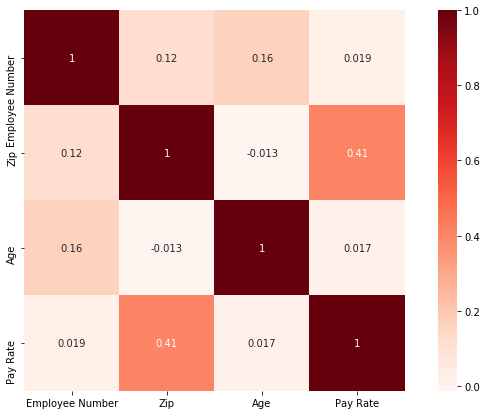

In [12]:
#Now let's explore our data to see if there are any correlations

hmap = hr_df.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(hmap, vmax=1, square=True, annot=True, cmap="Reds")

#### From the heatmap above it looks like only pay rate and zip code are somewhat correlated. Let's explore further.

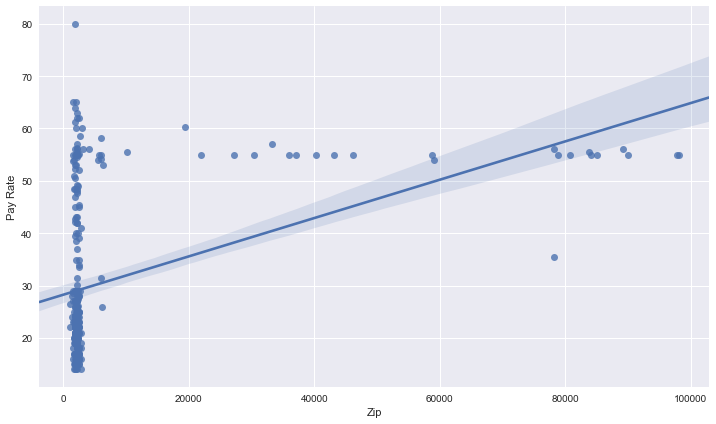

In [13]:
#Plotting regression for pay rate vs zip code
sns.set(rc={'figure.figsize':(12,7)})
sns.regplot( x = 'Zip', y = 'Pay Rate', data = hr_df)

#### It doesn't look very convincing that zip code and pay rate are correlated. Perhaps,  most of our employers live in the same zip code area which would explain some correlation. Overall, in our case correlation heatmap does not seem as a good way to see relationships in data

## Predict Performance Class

As a company we are interested in hiring people that will have a high performance score. Next, we will use our data to build a decision tree model to see if we can accurately predict one's performance.

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from IPython.display import Image


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
#Loading encoded dataset
predict_data=pd.read_csv('Desktop/HR_Dataset/HRDataset_v9_cleaned.csv') 
predict_data.head()

,Unnamed: 0,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,0,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,10/27/2008,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,1,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,1/6/2014,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,9/29/2014,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,3,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2/16/2015,58,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,4,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,5/1/2015,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [16]:
predict_data.columns

Index(['Unnamed: 0', 'Employee Name', 'Employee Number', 'MarriedID',
       'MaritalStatusID', 'GenderID', 'EmpStatus_ID', 'DeptID', 'Perf_ScoreID',
       'Age', 'Pay Rate', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'Hispanic/Latino', 'RaceDesc', 'Date of Hire',
       'Days Employed', 'Date of Termination', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Manager Name',
       'Employee Source', 'Performance Score'],
      dtype='object')

In [17]:
#Dropping duplicate columns and columns that we won't use in our decision tree
predict_data = predict_data.drop(['Unnamed: 0','Employee Name', 'Employee Number', 'State', 'Sex', 'Perf_ScoreID',
                                  'RaceDesc', 'Date of Hire', 'DOB', 'MaritalDesc', 'Hispanic/Latino', 
                                  'Date of Termination', 'Date of Hire', 'Manager Name','Reason For Term', 'Zip', 'Employee Number',
                                  'Employee Source', 'Position','Employment Status'],1 )

### Since we are only interested if an employee will or will not meet performance requirements, this becomes a binary classification problem. Now we need to encode our data accordingly 

In [18]:


#Drop rows where performance score = 'N/A- too early to review'
predict_data = predict_data[predict_data['Performance Score'] != 'N/A- too early to review']
                                
#Reset index after dropping rows
predict_data.reset_index(drop=True, inplace=True)

#Encode Performance score as 1 and 0
PerformanceScore_map = {'Needs Improvement': 0,
                        'Fully Meets': 1,
                        '90-day meets': 1,
                        'Exceeds': 1,
                        'Exceptional': 1,
                        'PIP': 0}
predict_data['Performance Score'] = predict_data['Performance Score'].replace(PerformanceScore_map)

In [19]:
#Encode CitizenDesc columns
CitizenDesc_map = {'Eligible NonCitizen': 0,
                   'Non-Citizen': 0,
                   'US Citizen': 1}
predict_data['CitizenDesc'] = predict_data['CitizenDesc'].replace(CitizenDesc_map)

In [20]:
#Define parameters and target variable
params=predict_data.iloc[:,:-1] #defining predictors
y=predict_data.iloc[:,-1:] #defining target variable
params.columns

Index(['MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatus_ID', 'DeptID',
       'Age', 'Pay Rate', 'CitizenDesc', 'Days Employed', 'Department'],
      dtype='object')

In [21]:
#We still have 1 column that need to be encoded
cols=params.iloc[:,9:]
cols.head()
# cols.shape

,Department
0,Admin Offices
1,Admin Offices
2,Admin Offices
3,Admin Offices
4,Admin Offices


In [22]:
#Use onehot encoder method to encode Department column
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
onc = OneHotEncoder(categorical_features='all')
le =LabelEncoder()
cols.iloc[:,0] = le.fit_transform(cols.iloc[:,0])
cols =onc.fit_transform(cols).toarray()
print(cols)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [23]:
#Put encoded Department into a dataframe
enc_data=pd.DataFrame(data=cols,index=range(273),columns=['Admin Offices','Executive Office','IT/IS','Production','Sales','Software Engineering',])


In [24]:
#Concatenate two dataframes
enc_data=pd.concat([params.iloc[:,:9],enc_data],axis=1)

In [25]:
# Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(enc_data, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(191, 15) (191, 1)
(82, 15) (82, 1)


In [44]:
#Build and fit decision tree model
dtree = DecisionTreeRegressor(random_state=123, max_features=len(enc_data.columns))
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=15,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

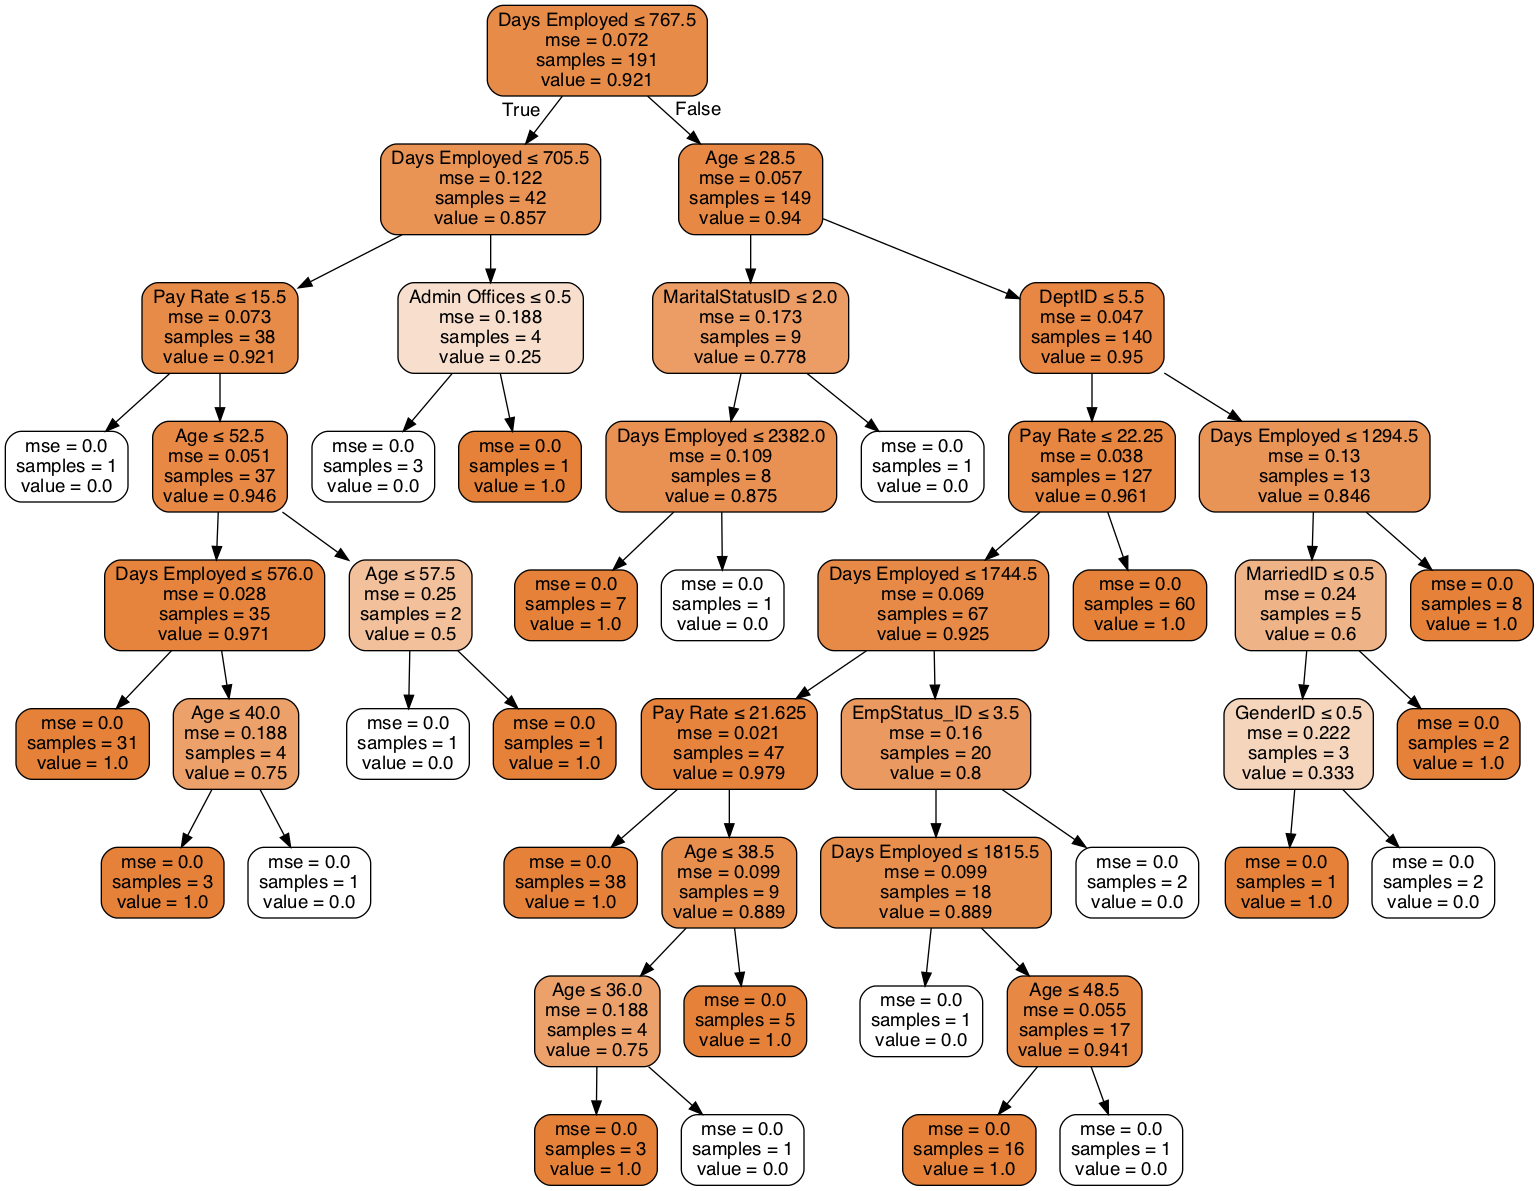

In [45]:
#Visualize decision tree and save it to a file
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names = X_train.columns,
                class_names = y_train.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png('dtree.png')

In [46]:
#Predict class of Performance (Meets=1, Doesn't meet = 0)
y_pred = dtree.predict(X_test)
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
#Compute accuracy and R^2 score
accuracy = accuracy_score(y_test,y_pred)*100
print ("Accuracy is: %2f%%" % (accuracy))
print ("R^2 is ", dtree.score(X_train, y_train))

Accuracy is: 82.926829%
R^2 is  1.0


### Let's see if we can get a better prediction accuracy with XGBoost Mode

In [32]:
#Build a XGBoost Model
X = enc_data
y = y
data_dmatrix = xgb.DMatrix(data=X , label = y)

In [33]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [34]:
# Compile an XGB model
xg_class = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                 n_estimators = 20)

In [35]:
#Fit the model to train data
xg_class.fit(X_train,y_train)

#Compute accuracy and rmse
preds = xg_class.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Accuracy: 89.02%
RMSE: 0.331295


/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


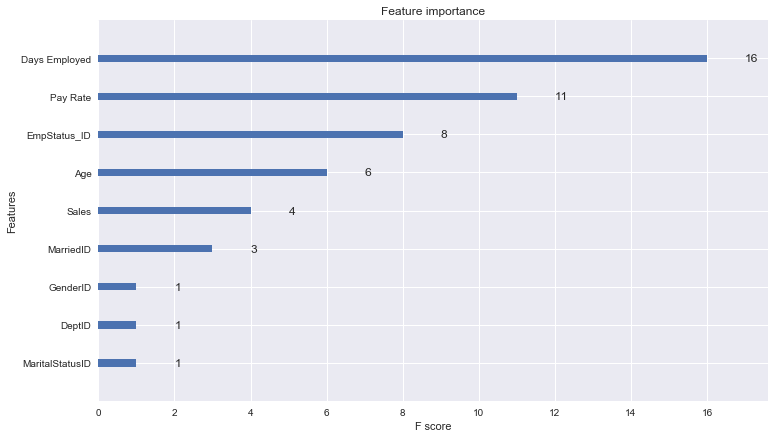

In [36]:
#Plot feature importance
from xgboost import plot_importance
plot_importance(xg_class)

In [48]:
xg_class.evals_result

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>